<a href="https://colab.research.google.com/github/pascalpap20/PSO_SISDAS/blob/main/FUZZY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.1MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894088 sha256=44bf202b2686f5c79d36b2d5deef705b15bb2ca9d3ce8867853dd302d79fcfc2
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

Generate variable

In [187]:
temperature = np.arange(24.94, 25.8, 0.2)
humidity = np.arange(78.41, 81.86, 0.86)
wind_speed = np.arange(0.5, 2.55, 0.41)

Generate fuzzy membership function

In [188]:
temperature_very_low = fuzz. trimf(temperature, [0,       24.94,  25.14])
temperature_low = fuzz. trimf(temperature, [24.94,   25.14,  25.34])
temperature_medium = fuzz. trimf(temperature, [25.14,   25.34,  25.54])
temperature_high = fuzz. trimf(temperature, [25.34,   25.54,  25.74])
temperature_very_high = fuzz. trimf(temperature, [25.54,   25.74,  25.74])


humidity_very_high = fuzz. trimf(humidity, [0,       78.41,  79.26])
humidity_high = fuzz. trimf(humidity, [78.41,   79.27,  80.13])
humidity_medium = fuzz. trimf(humidity,  [79.27,   80.13,  80.99])
humidity_low = fuzz. trimf(humidity, [80.13,   80.99,  81.85])
humidity_very_low = fuzz. trimf(humidity, [80.99,   81.85,  81.85])

wind_speed_very_high = fuzz. trimf(wind_speed, [1.73,  2.14, 2.14])
wind_speed_high = fuzz. trimf(wind_speed, [1.32,  1.73, 2.14])
wind_speed_medium = fuzz. trimf(wind_speed, [0.91,  1.32,  1.73])
wind_speed_low = fuzz. trimf(wind_speed, [0.5, 0.91, 1.32])
wind_speed_very_low = fuzz. trimf(wind_speed, [0,   0.5,  0.91])

Visualisasi membership function

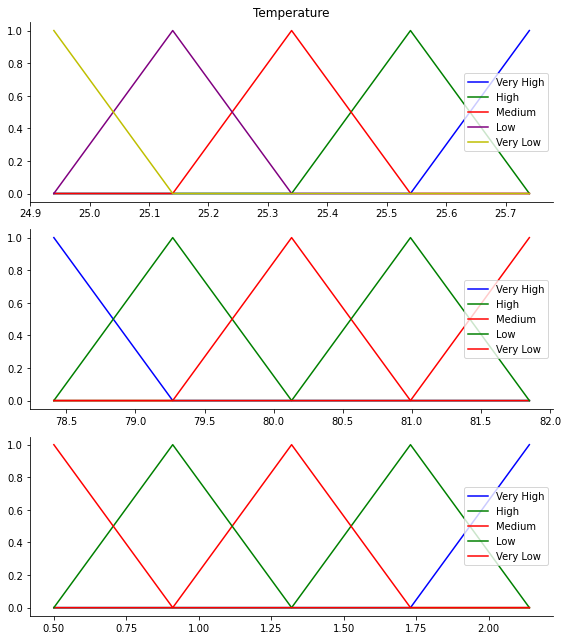

In [189]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(temperature, temperature_very_high, 'b', linewidth=1.5, label='Very High')
ax0.plot(temperature, temperature_high, 'g', linewidth=1.5, label='High')
ax0.plot(temperature, temperature_medium, 'r', linewidth=1.5, label='Medium')
ax0.plot(temperature, temperature_low, 'purple', linewidth=1.5, label='Low')
ax0.plot(temperature, temperature_very_low, 'y', linewidth=1.5, label='Very Low')
ax0.set_title('Temperature')
ax0.legend()

ax1.plot(humidity, humidity_very_high, 'b', linewidth=1.5, label='Very High')
ax1.plot(humidity, humidity_high, 'g', linewidth=1.5, label='High')
ax1.plot(humidity, humidity_medium, 'r', linewidth=1.5, label='Medium')
ax1.plot(humidity, humidity_low, 'g', linewidth=1.5, label='Low')
ax1.plot(humidity, humidity_very_low, 'r', linewidth=1.5, label='Very Low')
ax1.legend()

ax2.plot(wind_speed, wind_speed_very_high, 'b', linewidth=1.5, label='Very High')
ax2.plot(wind_speed, wind_speed_high, 'g', linewidth=1.5, label='High')
ax2.plot(wind_speed, wind_speed_medium, 'r', linewidth=1.5, label='Medium')
ax2.plot(wind_speed, wind_speed_low, 'g', linewidth=1.5, label='Low')
ax2.plot(wind_speed, wind_speed_very_low, 'r', linewidth=1.5, label='Very Low')
ax2.legend()


# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

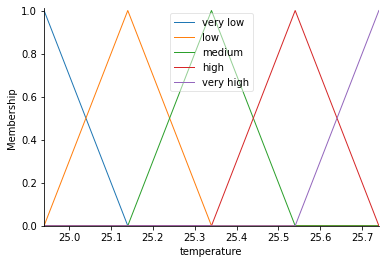

In [193]:
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
temperature = ctrl.Antecedent(np.arange(24.94, 25.8, 0.2), 'temperature')
temperature['very low'] = fuzz.trimf(temperature.universe,      [0,       24.94,  25.14])
temperature['low'] = fuzz.trimf(temperature.universe,           [24.94,   25.14,  25.34])
temperature['medium'] = fuzz.trimf(temperature.universe,        [25.14,   25.34,  25.54])
temperature['high'] = fuzz.trimf(temperature.universe,          [25.34,   25.54,  25.74])
temperature['very high'] = fuzz.trimf(temperature.universe,     [25.54,   25.74,  25.74])


# temperature.automf(5)
temperature.view()

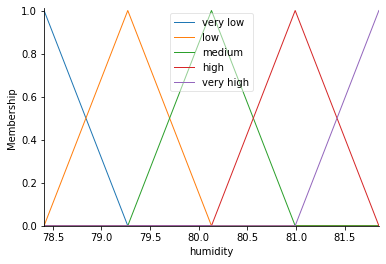

In [194]:
humidity = ctrl.Antecedent(np.arange(78.41, 81.86, 0.86), 'humidity')
humidity['very low'] = fuzz.trimf(humidity.universe,      [0,       78.41,  79.26])
humidity['low'] = fuzz.trimf(humidity.universe,           [78.41,   79.27,  80.13])
humidity['medium'] = fuzz.trimf(humidity.universe,        [79.27,   80.13,  80.99])
humidity['high'] = fuzz.trimf(humidity.universe,          [80.13,   80.99,  81.85])
humidity['very high'] = fuzz.trimf(humidity.universe,     [80.99,   81.85,  81.85])

# humidity.automf(5)
humidity.view()

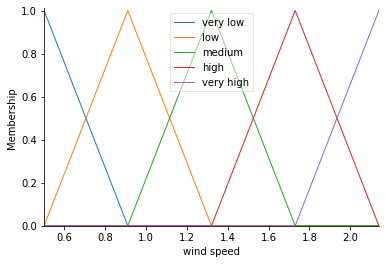

In [195]:
wind_speed = ctrl.Antecedent(np.arange(0.5, 2.55, 0.41), 'wind speed')
wind_speed['very low'] = fuzz.trimf(wind_speed.universe,      [0,   0.5,  0.91])
wind_speed['low'] = fuzz.trimf(wind_speed.universe,           [0.5, 0.91, 1.32])
wind_speed['medium'] = fuzz.trimf(wind_speed.universe,        [0.91,  1.32,  1.73])
wind_speed['high'] = fuzz.trimf(wind_speed.universe,          [1.32,  1.73, 2.14])
wind_speed['very high'] = fuzz.trimf(wind_speed.universe,     [1.73,  2.14, 2.14])

# wind_speed.automf(5)
wind_speed.view()

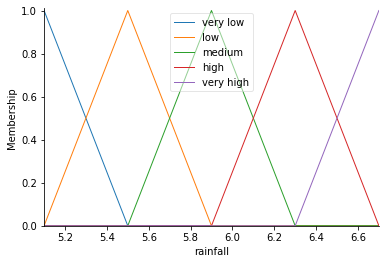

In [196]:
rainfall = ctrl.Consequent(np.arange(5.1, 6.71, 0.1), 'rainfall')
rainfall['very low'] = fuzz.trimf(rainfall.universe,      [0,   5.1,  5.5])
rainfall['low'] = fuzz.trimf(rainfall.universe,           [5.1, 5.5,  5.9])
rainfall['medium'] = fuzz.trimf(rainfall.universe,        [5.5, 5.9,  6.3])
rainfall['high'] = fuzz.trimf(rainfall.universe,          [5.9, 6.3, 6.7])
rainfall['very high'] = fuzz.trimf(rainfall.universe,     [6.3, 6.7,  6.7])
rainfall.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0da3ba7350>)

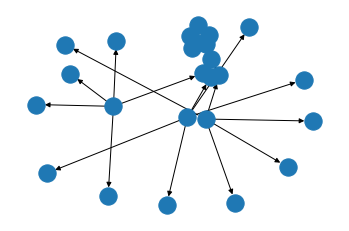

In [199]:
rule1 = ctrl.Rule(temperature['very low'] & wind_speed['low'] & humidity['very high'],  rainfall['very low'])
rule2 = ctrl.Rule(temperature['medium'] & wind_speed['low'] & humidity['high'],       rainfall['medium'])
rule3 = ctrl.Rule(temperature['low'] & wind_speed['very low'] & humidity['high'],          rainfall['medium'])
rule4 = ctrl.Rule(temperature['low'] & wind_speed['very low'] & humidity['high'],          rainfall['low'])
rule5 = ctrl.Rule(temperature['low'] & wind_speed['very low'] & humidity['low'],           rainfall['very low'])
rule6 = ctrl.Rule(temperature['medium'] & wind_speed['high'] & humidity['low'],            rainfall['low'])
rule7 = ctrl.Rule(temperature['medium'] & wind_speed['very high'] & humidity['low'],       rainfall['low'])
rule8 = ctrl.Rule(temperature['medium'] & wind_speed['very high'] & humidity['medium'],    rainfall['very high'])
rule9 = ctrl.Rule(temperature['very high'] & wind_speed['very high'] & humidity['medium'], rainfall['high'])
rule10 = ctrl.Rule(temperature['very high'] & wind_speed['very high'] & humidity['high'],  rainfall['low'])

rule5.view()

In [200]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [206]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['temperature'] = 25.2
tipping.input['humidity'] = 81
tipping.input['wind speed'] = 0.964

# Crunch the numbers
tipping.compute()
tipping.output['rainfall']

5.8999999999999995

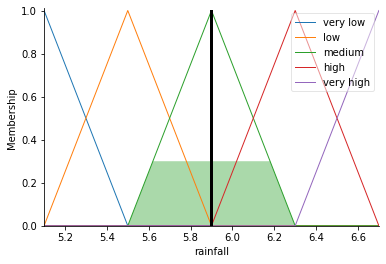

In [208]:
rainfall.view(sim=tipping)